In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.signal import filtfilt, butter
import scipy

In [ ]:
##Cargar EEG ABIERTOS
df_Aeeg = pd.read_excel("D_P_Abiertos_T_1.xlsx")
rango_a=7499
rango_b=(df_Aeeg['EEGAF3'].size)
df_Aeeg = df_Aeeg.drop(df_Aeeg.index[range(rango_a,rango_b)])
df_Aeeg=df_Aeeg.drop(["EEGCounter","OriginalTimestamp","EEGCounter","EEGInterpolated","Timestamp","EEGRawCq", "EEGBattery","EEGBatteryPercent","MarkerIndex","MarkerType","MarkerValueInt","EEGMarkerHardware","CQAF3","CQF7","CQF3","CQFC5","CQT7","CQP7","CQO1","CQO2","CQP8","CQT8","CQFC6","CQF4","CQF8","CQAF4","CQOverall","EQSampleRateQuality","EQOVERALL","EQAF3","EQF7","EQF3","EQFC5","EQT7","EQP7","EQO1","EQO2","EQP8","EQT8","EQFC6","EQF4","EQF8","EQAF4","PMEngagementIsActive","PMEngagementScaled","PMEngagementRaw","PMEngagementMin","PMEngagementMax","PMExcitementIsActive","PMExcitementScaled","PMExcitementRaw","PMExcitementMin","PMExcitementMax","PMLongTermExcitement","PMStressIsActive","PMStressScaled","PMStressRaw","PMStressMin","PMStressMax","PMRelaxationIsActive","PMRelaxationScaled","PMRelaxationRaw","PMRelaxationMin","PMRelaxationMax","PMInterestIsActive","PMInterestScaled","PMInterestRaw","PMInterestMin","PMInterestMax","PMFocusIsActive","PMFocusScaled","PMFocusRaw","PMFocusMin","PMFocusMax","POWAF3Theta","POWAF3Alpha","POWAF3BetaL","POWAF3BetaH","POWAF3Gamma","POWF7Theta","POWF7Alpha","POWF7BetaL","POWF7BetaH","POWF7Gamma","POWF3Theta","POWF3Alpha","POWF3BetaL","POWF3BetaH","POWF3Gamma","POWFC5Theta","POWFC5Alpha","POWFC5BetaL","POWFC5BetaH","POWFC5Gamma","POWT7Theta","POWT7Alpha","POWT7BetaL","POWT7BetaH","POWT7Gamma","POWP7Theta","POWP7Alpha","POWP7BetaL","POWP7BetaH","POWP7Gamma","POWO1Theta","POWO1Alpha","POWO1BetaL","POWO1BetaH","POWO1Gamma","POWO2Theta","POWO2Alpha","POWO2BetaL","POWO2BetaH","POWO2Gamma","POWP8Theta","POWP8Alpha","POWP8BetaL","POWP8BetaH","POWP8Gamma","POWT8Theta","POWT8Alpha","POWT8BetaL","POWT8BetaH","POWT8Gamma","POWFC6Theta","POWFC6Alpha","POWFC6BetaL","POWFC6BetaH","POWFC6Gamma","POWF4Theta","POWF4Alpha","POWF4BetaL","POWF4BetaH","POWF4Gamma","POWF8Theta","POWF8Alpha","POWF8BetaL","POWF8BetaH","POWF8Gamma","POWAF4Theta","POWAF4Alpha","POWAF4BetaL","POWAF4BetaH","POWAF4Gamma"],axis= 1, errors='ignore')


7499

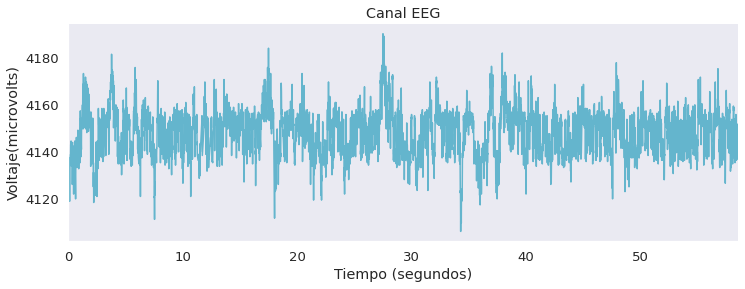

In [ ]:
sf = 128
canal_sel=df_Aeeg['EEGO2']
tiempo = np.arange(canal_sel.size)/sf ##Tamano Canal 
#t=tiempo.size
sns.set(font_scale=1.2, style='dark')
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(tiempo, canal_sel, lw=1.5, color='c')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Voltaje(microvolts)')
plt.xlim([tiempo.min(), tiempo.max()])
plt.title('Canal EEG')
sns.despine()

canal_sel.size



Text(0.5, 1.0, 'Canal EEG')

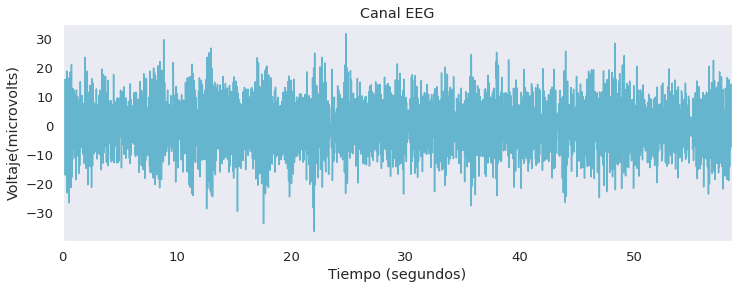

In [ ]:
def filtro_pasabanda (canal_sel):
    fs = 128
    lowcut = 5
    highcut = 40

    nyq= 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    order = 3

    b,a = scipy.signal.butter(order, [low, high], 'bandpass', analog= False)
    y= scipy.signal.filtfilt(b, a, canal_sel, axis = 0)
    return(y)

senal_filtrada = filtro_pasabanda(canal_sel)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(tiempo, senal_filtrada, lw=1.5, color='c')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Voltaje(microvolts)')
plt.xlim([tiempo.min(), tiempo.max()])
plt.title('Canal EEG')


In [ ]:
resolucion = 2/0.5
win = resolucion * sf
freqs, psd = signal.welch(senal_filtrada, sf, nperseg=win)

3


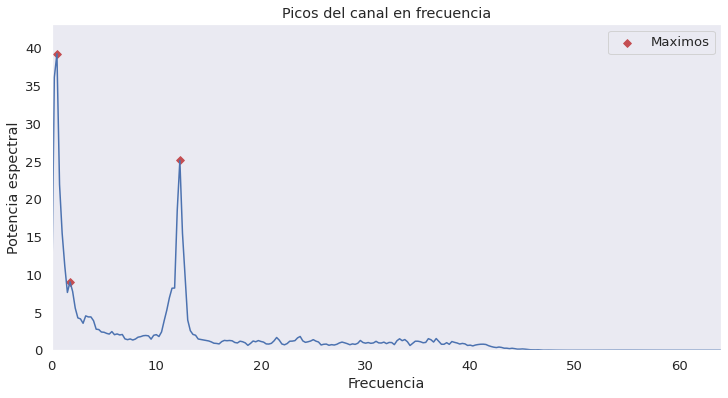

In [ ]:
picos = find_peaks(psd, height=1, threshold=1, distance=1)

altura_picos= picos[1]['peak_heights']
pos_picos= freqs[picos[0]]

y2= psd*-1
minimo = find_peaks(y2)
min_pos = freqs[minimo[0]]
alt_min = y2[minimo[0]]
#---------------------------------------------------------------------------------

fig_p= plt.figure(figsize=(12, 6))
ax= fig_p.subplots()
ax.plot(freqs, psd)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia espectral')
plt.ylim([0, psd.max() * 1.1])
plt.title("Picos del canal en frecuencia")
plt.xlim([0, freqs.max()])

ax.scatter(pos_picos, altura_picos, color='r', s= 30, marker = 'D', label = 'Maximos')
#ax.scatter(min_pos, alt_min, color='g', s= 30, marker = 'D', label = 'Minimos')
ax.legend()

#print(min_pos.size)
#print(alt_min.size)
print(altura_picos.size)


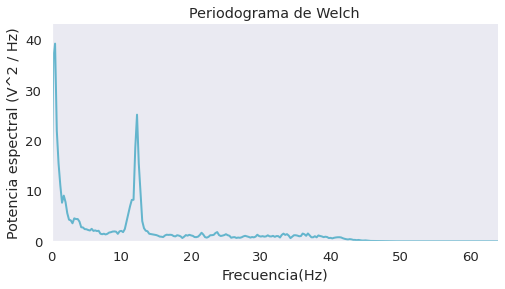

In [ ]:

# Potencia espectral
sns.set(font_scale=1.2, style='dark')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='c', lw=2)
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('Potencia espectral (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Periodograma de Welch")
plt.xlim([0, freqs.max()])
sns.despine()


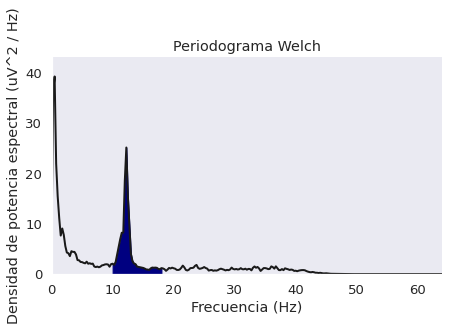

In [ ]:
# DEFINIR LIMITES DE LA BANDA

#DELTA de 0-4 Hz
#THETA de 4-8 Hz
#ALPHA de 8 a 12 Hz****
#BETA de  14-30 Hz ****
#GAMMA de 30-80 Hz

low, high = 10,18

# Intersección en el vector de frecuencia
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Densidad espectral
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='navy')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia espectral (uV^2 / Hz)')
plt.xlim([0, freqs.max()])
plt.ylim([0, psd.max() * 1.1])
plt.title("Periodograma Welch")
sns.despine()